# Predicting target variables using different models

### Prepare the training set (2022) and test set (2023) using 
https://github.com/sagerpascal/uzh-data-science-project/blob/main/WZ/Q5_datacleaning.ipynb

### Data downloaded from:
https://data.stadt-zuerich.ch/dataset/vbz_fahrgastzahlen_ogd

and

https://data.stadt-zuerich.ch/dataset/vbz_fahrzeiten_ogd

This script is for predicting y= occupancy without normalization. The dataset is not filtered for vehicle type. 

For trainings on y= occupancy with normalization and more details, see
ttps://github.com/sagerpascal/uzh-data-science-project/blob/main/src/Q5_norm_train.ipynb


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import umap
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
from joblib import dump

In [2]:
trainset = pd.read_csv('data/fahrgastzahlen_2022/cleaned.csv', sep=',')
testset = pd.read_csv('data/fahrgastzahlen_2023/cleaned.csv', sep=',')

In [3]:
trainset = trainset.drop(columns = ['Vehicle_type_B', 'Vehicle_type_FB', 'Vehicle_type_N', 
                                    'Vehicle_type_SB', 'Vehicle_type_TR', 'Vehicle_type_T'])
testset = testset.drop(columns = [ 'Vehicle_type_B', 'Vehicle_type_FB', 'Vehicle_type_N', 
                                    'Vehicle_type_SB', 'Vehicle_type_TR', 'Vehicle_type_T'])

In [4]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127063 entries, 0 to 1127062
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Time           1127063 non-null  float64
 1   Nachtnetz      1127063 non-null  int64  
 2   Capacity       1127063 non-null  int64  
 3   Occupancy      1127063 non-null  float64
 4   GPS_Latitude   1127063 non-null  float64
 5   GPS_Longitude  1127063 non-null  float64
 6   Weekday        1127063 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 60.2 MB


In [5]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960951 entries, 0 to 960950
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           960951 non-null  float64
 1   Nachtnetz      960951 non-null  int64  
 2   Capacity       960951 non-null  float64
 3   Occupancy      960951 non-null  float64
 4   GPS_Latitude   960951 non-null  float64
 5   GPS_Longitude  960951 non-null  float64
 6   Weekday        960951 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 51.3 MB


In [6]:
# Fit the scaler on the training set only
scaler = StandardScaler()
columns_to_normalize = ['Time', 'GPS_Latitude', 'GPS_Longitude',
                     #  'Occupancy' 
                     #  'Capacity' only to use to restore the number of empty seats
                       ]
scaler.fit(trainset[columns_to_normalize])

# Transform both training and test sets
trainset[columns_to_normalize] = scaler.transform(trainset[columns_to_normalize])
testset[columns_to_normalize] = scaler.transform(testset[columns_to_normalize])

In [8]:
trainset.head(10)

,Time,Nachtnetz,Capacity,Occupancy,GPS_Latitude,GPS_Longitude,Weekday
0,1.329027,0,32.0,0.100625,0.491249,-1.005551,1
1,1.329027,0,32.0,0.088636,0.491249,-1.005551,1
2,1.417528,0,32.0,0.097005,0.491249,-1.005551,1
3,1.417528,0,32.0,0.095905,0.491249,-1.005551,1
4,1.506030,0,32.0,0.080357,0.491249,-1.005551,1
5,1.506030,0,32.0,0.062500,0.491249,-1.005551,1
6,1.594531,0,32.0,0.051658,0.491249,-1.005551,1
7,1.152024,0,32.0,0.106250,0.491249,-1.005551,0
8,1.240526,0,32.0,0.085938,0.491249,-1.005551,0
9,1.240526,0,32.0,0.098958,0.491249,-1.005551,0


In [9]:
X_train = trainset.drop(columns=['Capacity', 'Occupancy'])
y_train = trainset['Occupancy']
X_test = testset.drop(columns=['Capacity', 'Occupancy'])
y_test = testset['Occupancy']
X_train.head()

,Time,Nachtnetz,GPS_Latitude,GPS_Longitude,Weekday
0,1.329027,0,0.491249,-1.005551,1
1,1.329027,0,0.491249,-1.005551,1
2,1.417528,0,0.491249,-1.005551,1
3,1.417528,0,0.491249,-1.005551,1
4,1.506030,0,0.491249,-1.005551,1


## Training models: linear regression and random forest with some GridSearchCV for best parameter

In [11]:
## Linear regression and random forest
# Define parameter grids for GridSearchCV, linear regression and random forest
param_grid_lr = {'fit_intercept': [True, False]}
# param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10]}

# Initialize models, verbose=1 to show progress
lr = LinearRegression()
rf = RandomForestRegressor(verbose=1)

# GridSearchCV for Linear Regression
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, verbose=1)
grid_lr.fit(X_train, y_train)

# GridSearchCV for Random Forest
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, verbose=1)
grid_rf.fit(X_train, y_train)

print("Best parameters for Linear Regression:", grid_lr.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)

# Fit the training data with best parameters
best_lr = grid_lr.best_estimator_
best_lr.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
best_rf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   51.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   49.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   48.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Best parameters for Linear Regression: {'fit_intercept': True}
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.2min finished


RandomForestRegressor(max_depth=10, n_estimators=200, verbose=1)

In [12]:
# Dump save trained model
# Get the current date and time
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

directory_path = 'models/'

lr_model_filename = f'{directory_path}linear_regression_model_{timestamp}.joblib'
rf_model_filename = f'{directory_path}random_forest_model_{timestamp}.joblib'

dump(best_lr, lr_model_filename)
dump(best_rf, rf_model_filename)

['models/random_forest_model_2024-05-15_14-11-10.joblib']

In [13]:
# Calculate the median of the predictions
median_y_train = np.median(y_train)

# Calculate the mean absolute error (MAE) of the median predictor
mae_med = np.mean(np.abs(y_train - median_y_train))
print(f"The mean absolute error of the median predictor is: {mae_med}")

The mean absolute error of the median predictor is: 0.16145616083394637


In [14]:
# Check the metrics for predicting on the test set
# Predict on the test set
y_pred_lr = best_lr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

# Calculate MAPE with a small denominator to prevent inf
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / (y_test + 1e-10))) * 100
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / (y_test + 1e-10))) * 100

# Calculate MAE 
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate MSE
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Linear Regression MAPE on test set:", mape_lr)
print("Linear Regression MAE on test set:", mae_lr)
print("Linear Regression MSE on test set:", mse_lr)

print("Random Forest MAPE on test set:", mape_rf)
print("Random Forest MAE on test set:", mae_rf)
print("Random Forest MSE on test set:", mse_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Linear Regression MAPE on test set: 1419205438.8700109
Linear Regression MAE on test set: 0.17998406745708823
Linear Regression MSE on test set: 0.054279825619462325
Random Forest MAPE on test set: 628985500.2298036
Random Forest MAE on test set: 0.1340721298368586
Random Forest MSE on test set: 0.03400890427690564


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    7.1s finished


In [15]:
# Check the metrics for predicting on the training set
y_pred_lr = best_lr.predict(X_train)
y_pred_rf = best_rf.predict(X_train)

# Calculate MAPE with a small denominator to prevent inf
mape_lr = np.mean(np.abs((y_train - y_pred_lr) / (y_train + 1e-10))) * 100
mape_rf = np.mean(np.abs((y_train - y_pred_rf) / (y_train + 1e-10))) * 100

# Calculate MAE 
mae_lr = mean_absolute_error(y_train, y_pred_lr)
mae_rf = mean_absolute_error(y_train, y_pred_rf)

# Calculate MSE
mse_lr = mean_squared_error(y_train, y_pred_lr)
mse_rf = mean_squared_error(y_train, y_pred_rf)

print("Linear Regression MAPE on training set:", mape_lr)
print("Linear Regression MAE on training set:", mae_lr)
print("Linear Regression MSE on training set:", mse_lr)

print("Random Forest MAPE on training set:", mape_rf)
print("Random Forest MAE on training set:", mae_rf)
print("Random Forest MSE on training set:", mse_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Linear Regression MAPE on training set: 815992877.1529106
Linear Regression MAE on training set: 0.15956712242668422
Linear Regression MSE on training set: 0.04062511524015899
Random Forest MAPE on training set: 396895067.7580125
Random Forest MAE on training set: 0.11668018858707302
Random Forest MSE on training set: 0.024467338236967572


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.1s finished


(array([3.96187e+05, 3.52695e+05, 1.59562e+05, 4.21990e+04, 8.23700e+03,
        1.56500e+03, 3.70000e+02, 1.07000e+02, 2.50000e+01, 4.00000e+00]),
 array([0.        , 0.22454545, 0.44909091, 0.67363636, 0.89818182,
        1.12272727, 1.34727273, 1.57181818, 1.79636364, 2.02090909,
        2.24545455]),
 <BarContainer object of 10 artists>)

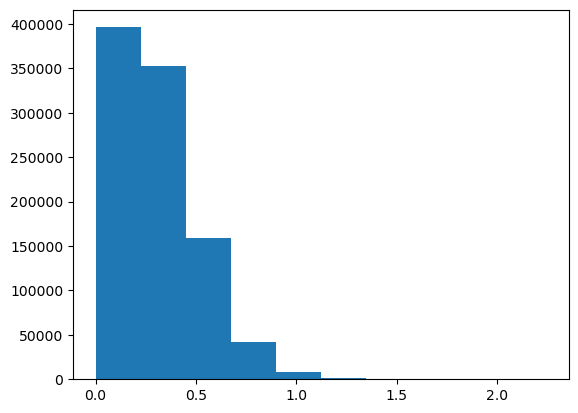

In [21]:
plt.hist(y_train)

(array([5.43525e+05, 3.82378e+05, 1.52202e+05, 3.86590e+04, 8.17500e+03,
        1.81300e+03, 2.58000e+02, 2.60000e+01, 2.40000e+01, 3.00000e+00]),
 array([0.        , 0.26666667, 0.53333333, 0.8       , 1.06666667,
        1.33333333, 1.6       , 1.86666667, 2.13333333, 2.4       ,
        2.66666667]),
 <BarContainer object of 10 artists>)

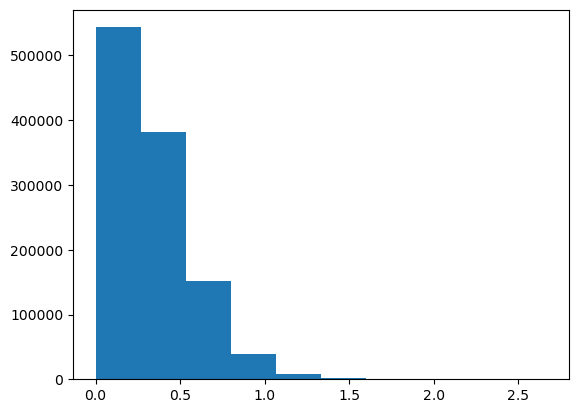

In [22]:
plt.hist(y_test)

In [ ]:
# Models:
# 2024-05-14_15-59-58: Done with unormalized Occupancy, with vehicle type. lr + rf
# 2024-05-14_16-49-07: Done with normalized Occupancy, with vehicle type. lr + rf
# 2024-05-14_17-16-45: Done with normalized Occupanct, 2017 as training set. lr + rf
# 2024-05-14_20-29-31: 0.2-sized tram only 2017, svr.
# 2024-05-14_21-57-38: 0.2-sized tram only 2017, svr with grid search. C=10.
# 2024-05-14_22-18-31: tram only 2017, lr + rf.
# 2024-05-15_10-55-34: tram only 2017, svr.
# 2024-05-15_14-11-10: 2022, all vehicle types, without norm on occupancy